In [4]:
!python -V

Python 3.8.16


In [1]:
import tensorflow as tf 
print(tf.__version__)

2.12.0


In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# tf, keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# 피마 인디언 데이터 불러오기
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", 
                          "thickness", "insulin", "BMI", 
                          "pedigree", "age", "class"])


In [5]:
print(df.shape)
df.head()

(768, 9)


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# 변수들의 데이터 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# 수치형 변수들의 기초통계량 확인
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 데이터간 상관관계 분석
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


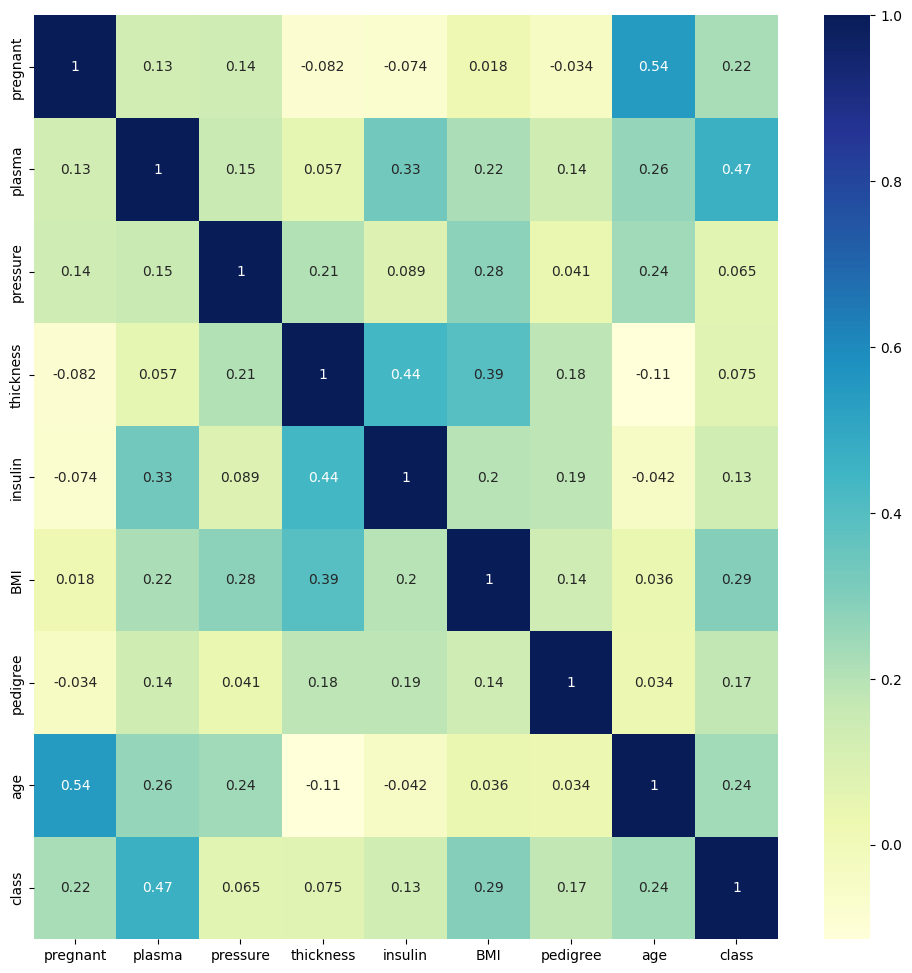

In [9]:
plt.figure(figsize=(12, 12))

# 히트맵 그리기
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [10]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

In [11]:
dataset = df.values
dataset.shape

(768, 9)

In [12]:
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [13]:
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# 모델 컴파일(모델에게 최적화에 필요한 정보 - 오차함수, 경사하강법 설정)
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [15]:
# 모델 학습
model.fit(X, Y,
         epochs=200, 
         batch_size=30)

Epoch 1/200
26/26 [==============================] - 0s 994us/step - loss: 1.6544 - accuracy: 0.5443
Epoch 2/200
26/26 [==============================] - 0s 828us/step - loss: 1.0015 - accuracy: 0.5247
Epoch 3/200
26/26 [==============================] - 0s 751us/step - loss: 0.8099 - accuracy: 0.5573
Epoch 4/200
26/26 [==============================] - 0s 715us/step - loss: 0.7142 - accuracy: 0.6068
Epoch 5/200
26/26 [==============================] - 0s 735us/step - loss: 0.6720 - accuracy: 0.6562
Epoch 6/200
26/26 [==============================] - 0s 728us/step - loss: 0.6431 - accuracy: 0.6680
Epoch 7/200
26/26 [==============================] - 0s 685us/step - loss: 0.6777 - accuracy: 0.6536
Epoch 8/200
26/26 [==============================] - 0s 702us/step - loss: 0.6962 - accuracy: 0.6523
Epoch 9/200
26/26 [==============================] - 0s 695us/step - loss: 0.6210 - accuracy: 0.6784
Epoch 10/200
26/26 [==============================] - 0s 876us/step - loss: 0.6305 - accura

26/26 [==============================] - 0s 678us/step - loss: 0.5543 - accuracy: 0.7344
Epoch 82/200
26/26 [==============================] - 0s 678us/step - loss: 0.5268 - accuracy: 0.7409
Epoch 83/200
26/26 [==============================] - 0s 698us/step - loss: 0.5226 - accuracy: 0.7630
Epoch 84/200
26/26 [==============================] - 0s 678us/step - loss: 0.5246 - accuracy: 0.7578
Epoch 85/200
26/26 [==============================] - 0s 678us/step - loss: 0.5526 - accuracy: 0.7201
Epoch 86/200
26/26 [==============================] - 0s 690us/step - loss: 0.5234 - accuracy: 0.7487
Epoch 87/200
26/26 [==============================] - 0s 678us/step - loss: 0.5154 - accuracy: 0.7539
Epoch 88/200
26/26 [==============================] - 0s 698us/step - loss: 0.5264 - accuracy: 0.7435
Epoch 89/200
26/26 [==============================] - 0s 638us/step - loss: 0.5349 - accuracy: 0.7396
Epoch 90/200
26/26 [==============================] - 0s 638us/step - loss: 0.5284 - accuracy: 

26/26 [==============================] - 0s 265us/step - loss: 0.4830 - accuracy: 0.7760
Epoch 161/200
26/26 [==============================] - 0s 630us/step - loss: 0.4756 - accuracy: 0.7760
Epoch 162/200
26/26 [==============================] - 0s 625us/step - loss: 0.4790 - accuracy: 0.7747
Epoch 163/200
26/26 [==============================] - 0s 625us/step - loss: 0.4709 - accuracy: 0.7812
Epoch 164/200
26/26 [==============================] - 0s 625us/step - loss: 0.4729 - accuracy: 0.7708
Epoch 165/200
26/26 [==============================] - 0s 605us/step - loss: 0.4795 - accuracy: 0.7695
Epoch 166/200
26/26 [==============================] - 0s 628us/step - loss: 0.4935 - accuracy: 0.7539
Epoch 167/200
26/26 [==============================] - 0s 625us/step - loss: 0.4840 - accuracy: 0.7682
Epoch 168/200
26/26 [==============================] - 0s 626us/step - loss: 0.4848 - accuracy: 0.7643
Epoch 169/200
26/26 [==============================] - 0s 624us/step - loss: 0.4788 - a

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
# 모델 정확도
model.evaluate(X, Y)[1]

24/24 [==============================] - 0s 855us/step - loss: 0.4969 - accuracy: 0.7565


0.7565104365348816

In [19]:
# 768개 데이터 중 76%에 대해 당뇨병 여부를 맞춤.